In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import gpxpy.geo

#read the hubway_trips and hubway_station csv files
df = pd.read_csv("http://localhost:8888/tree/Documents/HubWay/hubway_trips.csv")
stn_df=pd.read_csv("http://localhost:8888/tree/Documents/HubWay/hubway_stations.csv")

#the start_date and end_date columns are string since thy're read from a csv files, thus we convert it into datetime
df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%Y %H:%M:%S')
df['end_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%Y %H:%M:%S')

#storing the pandas dataframs in pickle files
df.to_pickle("hubway_trips.pkl")
stn_df.to_pickle("hubway_stations.pkl")

•	Read the hubway_trips.csv and hubway_station.csv files and store it as a pandas dataframe

•	Make a pickle file of both the dataframes so that python doesn’t need to read the csv file separately

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import gpxpy.geo

#reading the dataframe from the pickle file
df=pd.read_pickle("hubway_trips.pkl")
stn_df=pd.read_pickle("hubway_stations.pkl")

• From the second time onwards you don't need to read the csv files, you just need to read the pickle file to retieve the entire dataframe, as the dataframe is stored in the pickle file as a binary data, it can be accessed later at a very fast speed as compared to reading the csv file each time.

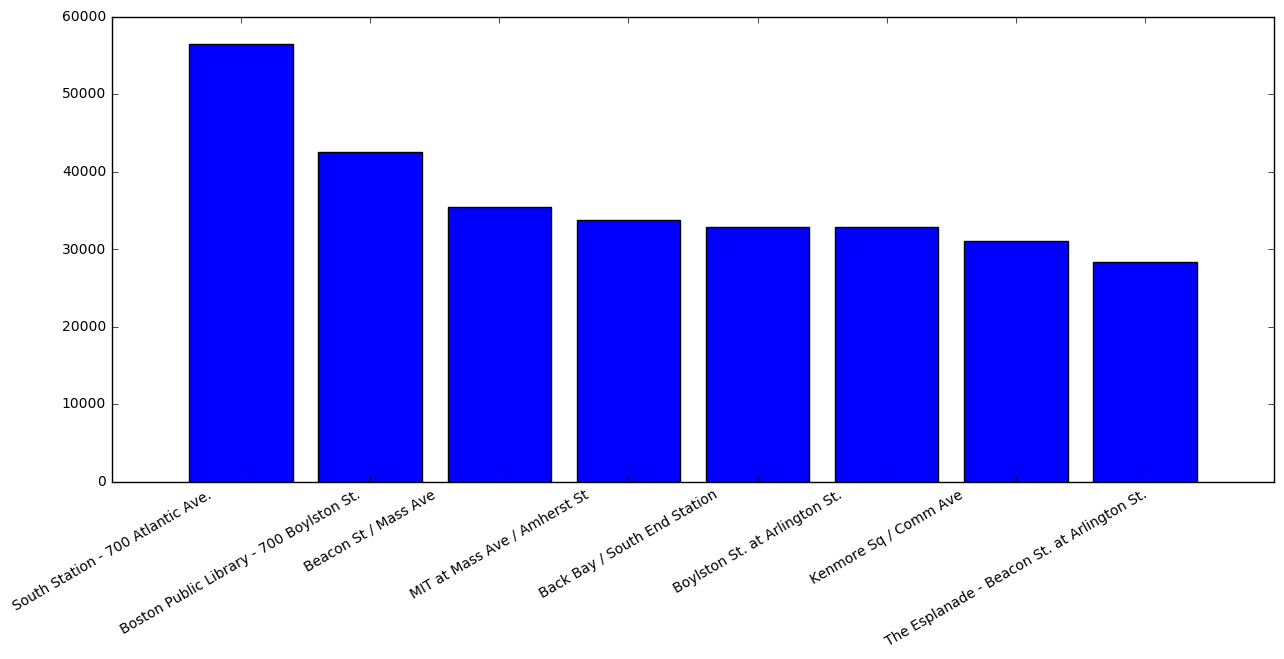

In [3]:
def top_stations(df, stn_df):
    fig,axes = plt.subplots(figsize=(15,6))
    
    #grouping and sorting the dataframe based on how busy the stations are in terms of number of bike rides
    top_stn=df.groupby([df["strt_statn"]]).count()
    top_stn.sort_values(by=["hubway_id"], ascending=False,inplace=True)
    top8=top_stn.index.values[0:10]
    station=[]
    for i in range(10):
        station.append(stn_df[stn_df["id"]==top8[i]]["station"].iloc[0])
    x=range(8)
    
    #plotting the top 8 busiest stations
    axes.set_xticklabels(station[0:8])
    axes.bar(x,top_stn["hubway_id"].head(8),align='center')
    plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.show()    
top_stations(df,stn_df)

• This bar graph shows the top 8 hubway stations by number of people

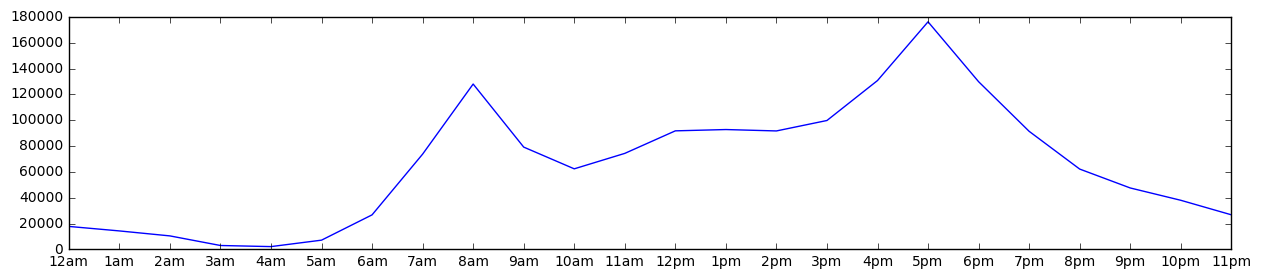

In [4]:
def peak_hours(df):
    fig,axes = plt.subplots(figsize=(15,3))
    x=range(24)
    
    #grouping and plotting the use of the Hubway bikes on the basis of time of the day
    peak=df.groupby([df["start_date"].dt.hour]).count()
    axes.set_xticks(x)
    axes.set_xticklabels(["12am","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"])
    axes.plot(x,peak["start_date"])
    show()
peak_hours(df)

•	This shows the peak hours across all the hubway stations at different times of the days. 

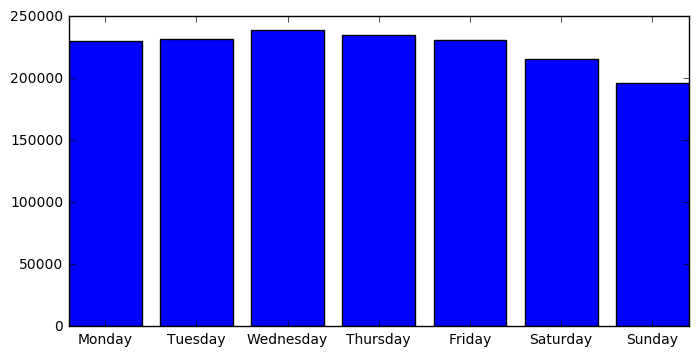

In [5]:
def by_days(df):
    fig,axes = plt.subplots(figsize=(8,4))
    x=range(7)
    
    #grouping and plotting the hubway rides on the basis of days of week
    peak=df.groupby([df["start_date"].dt.weekday]).count()
    axes.set_xticks(x)
    axes.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    axes.bar(x,peak["start_date"], align='center')
    plt.show()
by_days(df)

•	This bar graph portrays the rush across all stations by the days of the week 

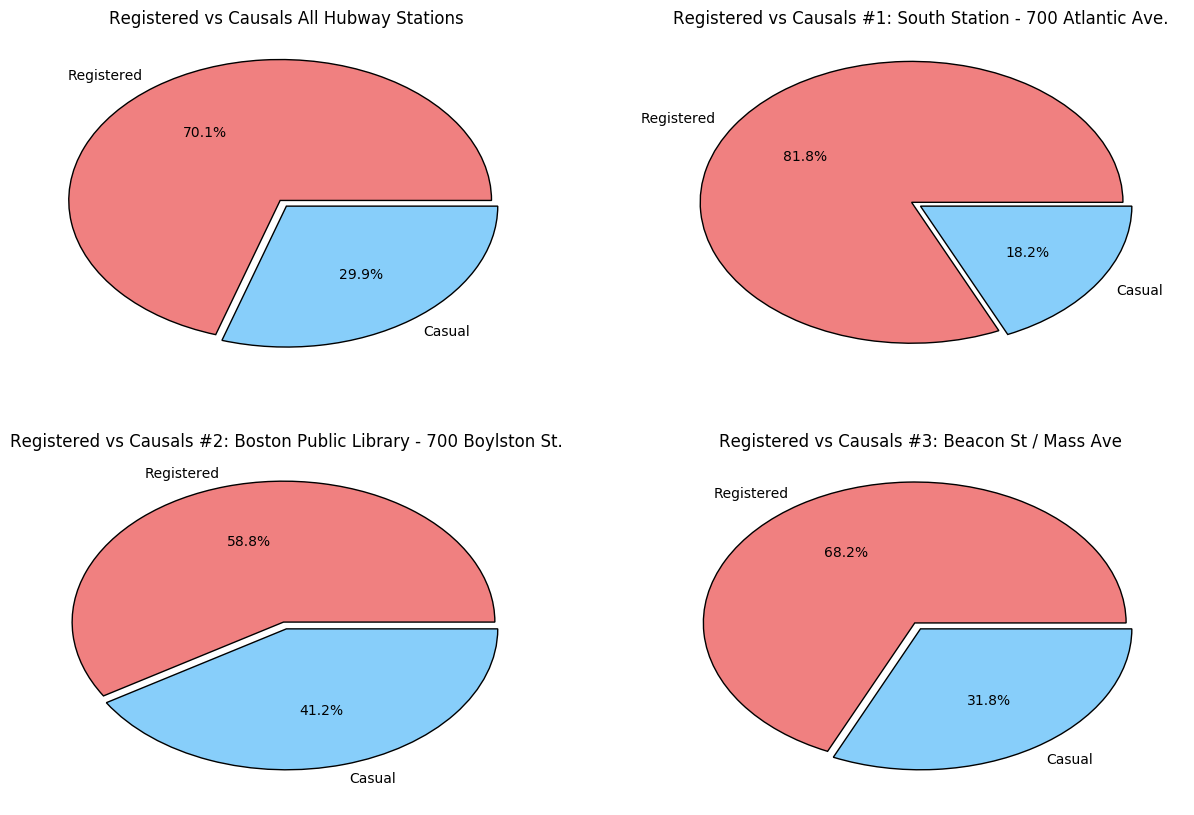

In [6]:
def reg_vs_cas(df,stn_df):
    fig = plt.figure(figsize=(15,10))
    
    #count the total number of registered and casual users
    reg=df[df["subsc_type"]=="Registered"]["subsc_type"].count()
    cas=df[df["subsc_type"]=="Casual"]["subsc_type"].count()
    labels=["Registered","Casual"]
    
    #overalll percentage of registerd users and casual users
    reg_frac=reg/(reg+cas)*100
    cas_frac=cas/(reg+cas)*100
    
    #group,sort and retrieve the 3 busiest stations in terms of number of users
    stn=df.groupby([df["strt_statn"]]).count()
    stn.sort_values(by=["subsc_type"], ascending=False,inplace=True)
    top3=stn.index.values[0:3]
    stn_reg=[]
    stn_cas=[]
    stn_reg_frac=[]
    stn_cas_frac=[]
    
    #calculate the number of registered and casual users and their corresponding percentages at all of the top 3 stations
    for x in range(3):
        stn_reg.append(df[(df["subsc_type"]=="Registered") & (df["strt_statn"]==top3[x])]["subsc_type"].count())
        stn_cas.append(df[(df["subsc_type"]=="Casual") & (df["strt_statn"]==top3[x])]["subsc_type"].count())
        stn_reg_frac.append(stn_reg[x]/(stn_reg[x]+stn_cas[x])*100)
        stn_cas_frac.append(stn_cas[x]/(stn_reg[x]+stn_cas[x])*100)
                
    #plot pie charts for all hubways stations and the top 3 stations for registered vs casual users    
    plt.subplot(221)
    plt.title("Registered vs Causals All Hubway Stations")
    plt.pie(x=[reg_frac,cas_frac],labels=labels,autopct='%1.1f%%',explode=[0.05,0],colors=['lightcoral','lightskyblue'])
    plt.subplot(222)
    station=stn_df[stn_df["id"]==top3[0]]["station"]
    plt.title("Registered vs Causals #1: {}".format(station.iloc[0]))
    plt.pie(x=[stn_reg_frac[0],stn_cas_frac[0]],labels=labels,autopct='%1.1f%%',explode=[0.05,0],colors=['lightcoral','lightskyblue'])
    plt.subplot(223)
    station=stn_df[stn_df["id"]==top3[1]]["station"]
    plt.title("Registered vs Causals #2: {}".format(station.iloc[0]))
    plt.pie(x=[stn_reg_frac[1],stn_cas_frac[1]],labels=labels,autopct='%1.1f%%',explode=[0.05,0],colors=['lightcoral','lightskyblue'])
    plt.subplot(224)
    station=stn_df[stn_df["id"]==top3[2]]["station"]
    plt.title("Registered vs Causals #3: {}".format(station.iloc[0]))
    plt.pie(x=[stn_reg_frac[2],stn_cas_frac[2]],labels=labels,autopct='%1.1f%%',explode=[0.05,0],colors=['lightcoral','lightskyblue'])    
    plt.show()

reg_vs_cas(df,stn_df)

• The pie chart shows the ratio in percentage of registered users vs the casual users across all the hubway stations and then it shows the same ratio across the top 3 stations.


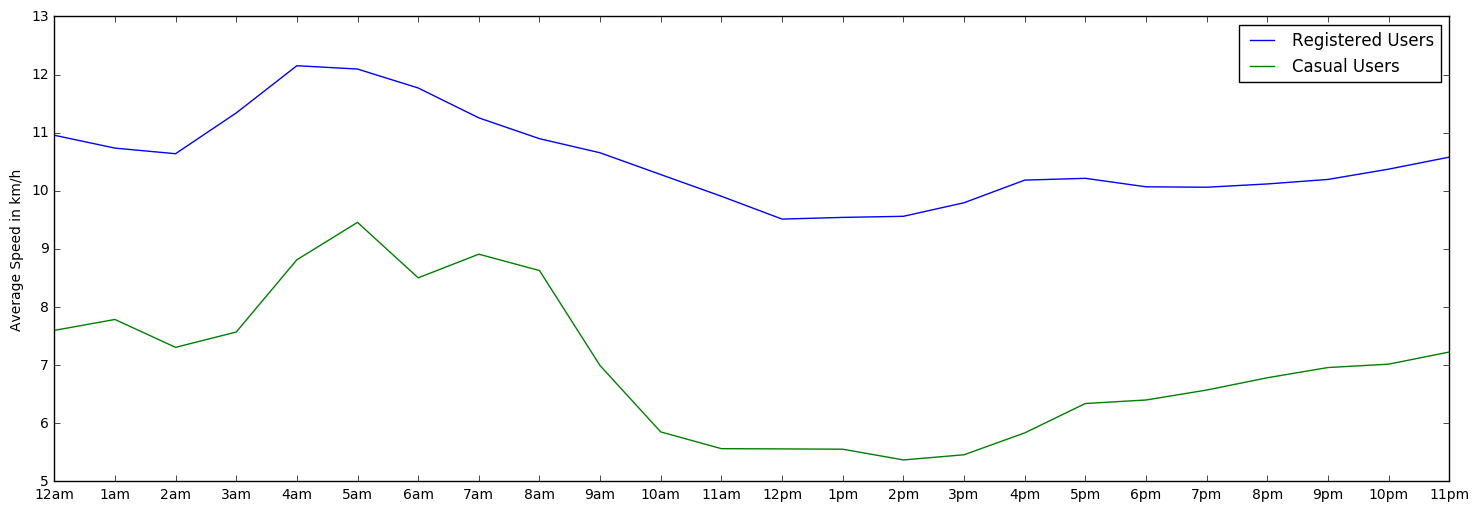

In [7]:
def dist(lat1,lon1,lat2,lon2):
    
    #caluate the distance between 2 points in meters based on the point's latitudes and longitudes
    return gpxpy.geo.haversine_distance(lat1, lon1, lat2, lon2)
def avg_speed(dist,duration):
    
    #calculate the average speed of a trip based on the duration and the calulated distance in km/hr
    if(dist!=0 and duration!=0):
        return (dist/duration)*3.6
    else:
        return 0

def speed(df,stn_df):
    fig,axes = plt.subplots(figsize=(18,6))
    
    #create a dataframe with all the possible combination of source and destination taken over the course of the 2 years of data
    orig_dest=df.groupby(["strt_statn","end_statn"]).size().reset_index()
    
    """merge the dataframes containing the source and the destination with the dataframe containing the details
        each station. The merge has to be performed 2 times so as to merge the data of the source station and 
        the destination station"""
    merge=pd.merge(orig_dest, stn_df, how = 'left', left_on = 'strt_statn', right_on = 'id')
    merge2=pd.merge(merge, stn_df, how = 'left', left_on = 'end_statn', right_on = 'id')
    
    #applying the distance function to each row on the newly formed dataframe to calculate the distance between the start and end station
    orig_dest["Distance"]=merge2.apply(lambda row: dist(row['lat_x'],row['lng_x'],row['lat_y'],row['lng_y']), axis=1)
    
    #merge this dataframe to the original dataframe to map the distance covered by each rider based on the start and end stations
    merge3=pd.merge(df,orig_dest, how='left',on=['strt_statn','end_statn'])
    
    #calculate the average speed of each ride using the calculated distance and the duration of each trip from the trip dataframe
    merge3["Speed"]=merge3.apply(lambda row: avg_speed(row["Distance"],row["duration"]), axis=1)
    columns=['seq_id','seq_id','status','duration','start_date','strt_statn','end_date','end_statn','bike_nr','subsc_type','zip_code','birth_date','gender','Distance','Speed']
    merge3=merge3.reindex(columns=columns)
    x=range(24)
    
    #plot the average speed for registerd and casual users throughout the day
    speed_registered=merge3.groupby([merge3[merge3["subsc_type"]=="Registered"]["start_date"].dt.hour]).mean()
    speed_casual=merge3.groupby([merge3[merge3["subsc_type"]=="Casual"]["start_date"].dt.hour]).mean()
    axes.set_xticks(x)
    axes.set_xticklabels(["12am","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"])
    axes.set_ylabel('Average Speed in km/h')
    axes.plot(x,speed_registered["Speed"], label="Registered Users")
    axes.plot(x,speed_casual["Speed"], label="Casual Users")
    axes.legend(loc=1)
    plt.show()
speed(df,stn_df)

• This graph shows the average speed of the registered users vs the casual users over the course of the day


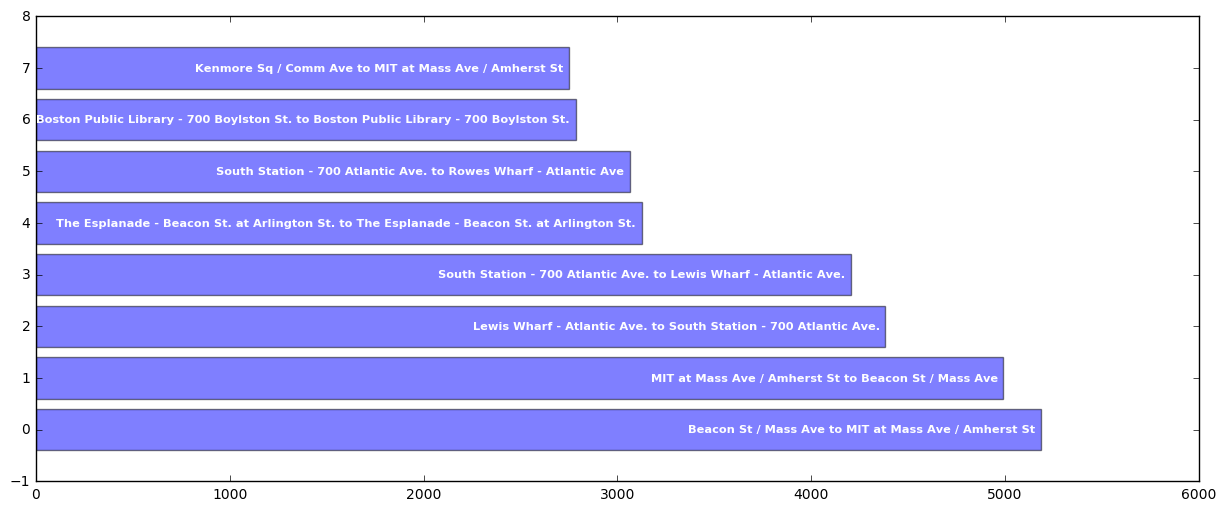

In [8]:
def orig_dest(df,stn_df):
    fig,axes = plt.subplots(figsize=(15,6))
    
    #group and sort the dataframe based on the top starting and ending stations
    top_stn=df.groupby(["strt_statn","end_statn"]).count()
    top_stn.sort_values(by=["hubway_id"], ascending=False,inplace=True)
    orig_stn=[]
    end_stn=[]
    
    #retrieve the top 8 famous routes of the hubway rides
    top8orig=top_stn.index.values[0:10]
    for i in range(10):
        orig_stn.append(stn_df[stn_df["id"]==top8orig[i][0]]["station"].iloc[0])
        end_stn.append(stn_df[stn_df["id"]==top8orig[i][1]]["station"].iloc[0])
    x=range(0,8)
    
    #plot the top 8 famous routes in a horizontal bar graph
    rects=axes.barh(x,top_stn["hubway_id"].head(8),align='center',alpha=0.5)
    axes.xaxis.label.set_size(15)
    rect_labels=[]
    count=-1
    for rect in rects:
        count+=1
        width = int(rect.get_width())
        xloc = width - 30
        clr = 'white'
        align = 'right'
        rankStr = '{} to {}'.format(orig_stn[count],end_stn[count])
        yloc = rect.get_y() + rect.get_height()/2.0
        
        #label the bargraph with the labels printed inside the bars insted of on the axis
        label = axes.text(xloc, yloc,rankStr, horizontalalignment=align,
                         verticalalignment='center', color=clr,
                         clip_on=True, fontsize=8.2,weight='bold')
        rect_labels.append(label)
    plt.show()
orig_dest(df,stn_df)

• This shows the most popular origin/destination pairs